In [ ]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.size'] = 12

In [52]:
import os
import pandas as pd
import re
# from subprocess import Popen, call
# os.chdir('..')
cities = pd.ExcelFile('./data/数据/实际数据/31个制造业.xlsx').sheet_names  
data = pd.read_excel('./data/数据/实际数据/31个制造业.xlsx', sheet_name='厦门')
features = data.columns[1:32]


In [ ]:
cities = ['三明', '南平', '厦门', '宁德', '泉州', '漳州', '福州', '莆田', '龙岩']
features = ['大工业', '居民', '农业', '非居照', '非普', '商业']

In [57]:
df_pred = pd.DataFrame(columns=['city', 'epidemic_time', 'duration','category', 'anomaly_time', 'time_lag_start', 'time_lag_end'])

In [13]:
for city in cities:
# city= '厦门'
    ind = 0
    df_pred = pd.DataFrame(columns=['city', 'feature', 'epidemic_time', 'duration', 'anomaly_time', 'time_lag_start', 'time_lag_end'])
    for feature in features:
        feature = re.sub(' .+\.', '',feature)
        data = pd.read_csv(f'./data/{city}_{feature}/test.csv')
        label = pd.read_csv(f'./data/{city}_{feature}/test_label.csv')
        epidemic = pd.to_datetime(data['timestamp'])[label.label==1]
        criterion = np.loadtxt(f'./data/{city}_{feature}/criterion.txt')
        time_range = [epidemic.index[0]]
        for i in epidemic.index[1:]:
            if i-1 == time_range[-1]:
                time_range.append(i)
            else:
                try:
                    end_time = max(np.arange(time_range[0], time_range[-1]+20)[criterion[tuple([range(time_range[0], time_range[-1]+20)])] > np.quantile(criterion, 0.98)])
                    start_time = min(np.arange(time_range[0], time_range[-1])[criterion[tuple([range(time_range[0], time_range[-1])])] > np.quantile(criterion, 0.98)])

                    td1 = pd.to_datetime(data['timestamp'].iloc[start_time]) - pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[0]
                    td2 = pd.to_datetime(data['timestamp'].iloc[end_time]) - pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[-1]

                    start_time, end_time = str(pd.to_datetime(data['timestamp'].iloc[start_time])).split(' ')[0], str(pd.to_datetime(data['timestamp'].iloc[end_time])).split(' ')[0]

                except:
                    end_time, start_time = ' ', ' '
                    td1, td2 = '-', '-'
                df_pred.loc[ind] = [
                    city, 
                    feature,
                    '{}--{}'.format(str(pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[0]).split(' ')[0], str(pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[-1]).split(' ')[0]),
                    str(pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[-1]-pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[0]).split(' ')[0],
                    '{}--{}'.format(start_time, end_time),
                    str(td1).split(' ')[0],
                    str(td2).split(' ')[0]
                ]

                ind += 1
                time_range = [i]
        try:
            end_time = max(np.arange(time_range[0], time_range[-1]+20)[criterion[tuple([range(time_range[0], time_range[-1]+20)])] > np.quantile(criterion, 0.98)])
            start_time = min(np.arange(time_range[0], time_range[-1])[criterion[tuple([range(time_range[0], time_range[-1])])] > np.quantile(criterion, 0.98)])

            td1 = pd.to_datetime(data['timestamp'].iloc[start_time]) - pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[0]
            td2 = pd.to_datetime(data['timestamp'].iloc[end_time]) - pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[-1]

            start_time, end_time = str(pd.to_datetime(data['timestamp'].iloc[start_time])).split(' ')[0], str(pd.to_datetime(data['timestamp'].iloc[end_time])).split(' ')[0]

        except:
            end_time, start_time = ' ', ' '
            td1, td2 = '-', '-'
        df_pred.loc[ind] = [
            city, 
            feature,
            '{}--{}'.format(str(pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[0]).split(' ')[0], str(pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[-1]).split(' ')[0]),
            str(pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[-1]-pd.to_datetime(data.iloc[time_range]['timestamp']).iloc[0]).split(' ')[0],
            '{}--{}'.format(start_time, end_time),
            str(td1).split(' ')[0],
            str(td2).split(' ')[0]
        ]

        ind += 1
        time_range = [i]

    df_pred.to_csv(f'./results/LagTab_{city}.csv', encoding='ANSI', index=False)

In [61]:
feature_eng = {'大工业':'Industry', 
               '居民':'Residential living', 
               '农业':'Agricultural electricity', 
               '非居照':'Non-residential lighting', 
               '非普':'Non-general industry', 
               '商业':'Commercial electricity'}
city_eng = {'三明':'Sanming', 
            '厦门':'Xiamen', 
            '漳州':'Zhangzhou', 
            '南平':'Nanping', 
            '宁德':'Ningde', 
            '泉州':'Quanzhou', 
            '福州':'Fuzhou', 
            '莆田':'Putian', 
            '龙岩':'Longyan'}

In [62]:
plt.rcParams['font.size'] = 30
plt.rcParams['pdf.fonttype'] = 42

In [63]:
import matplotlib.dates as mdate

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


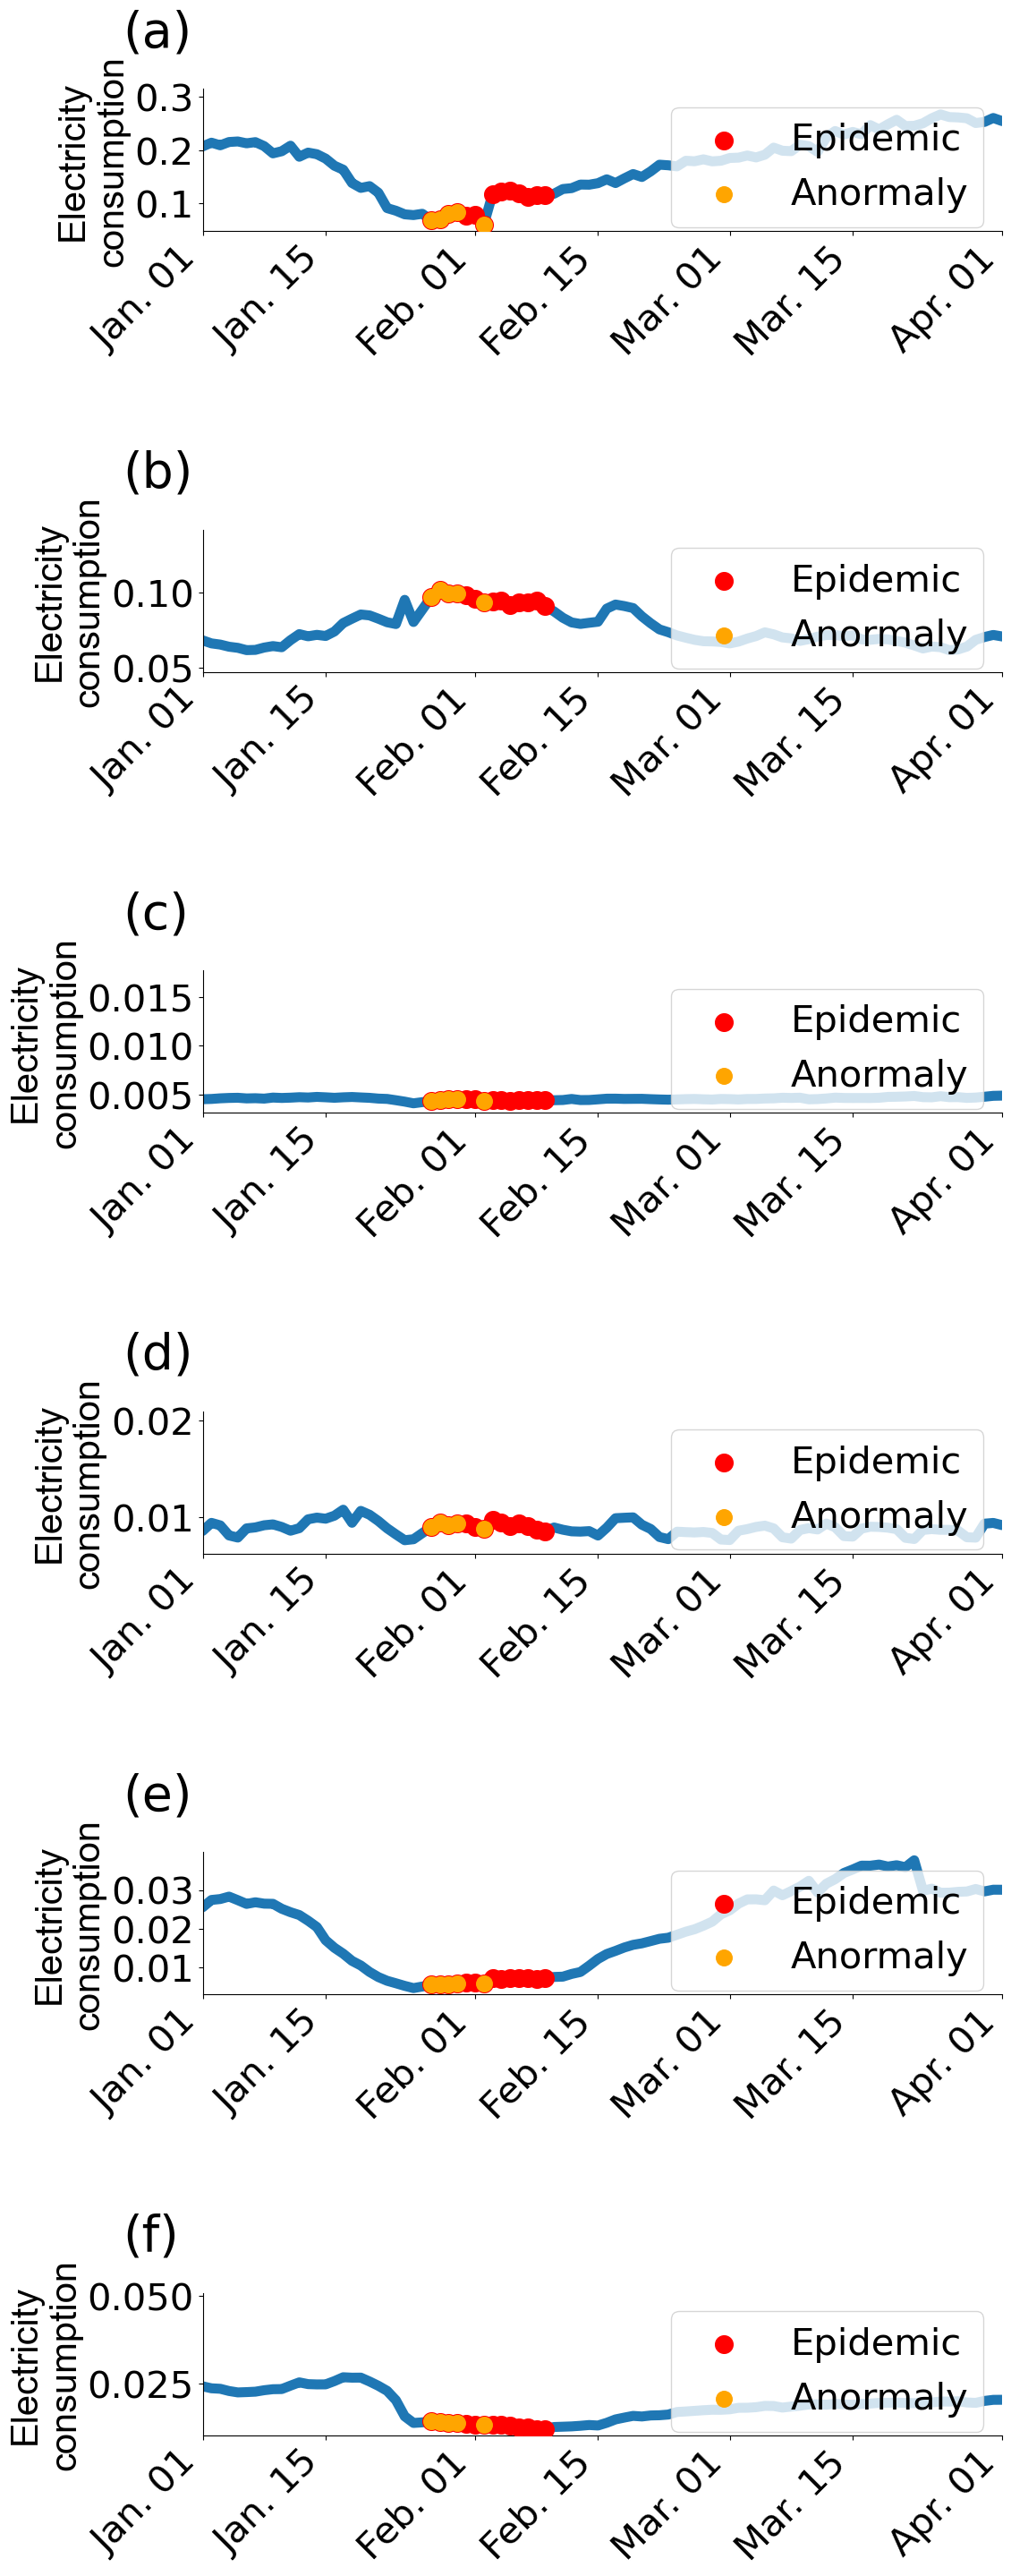

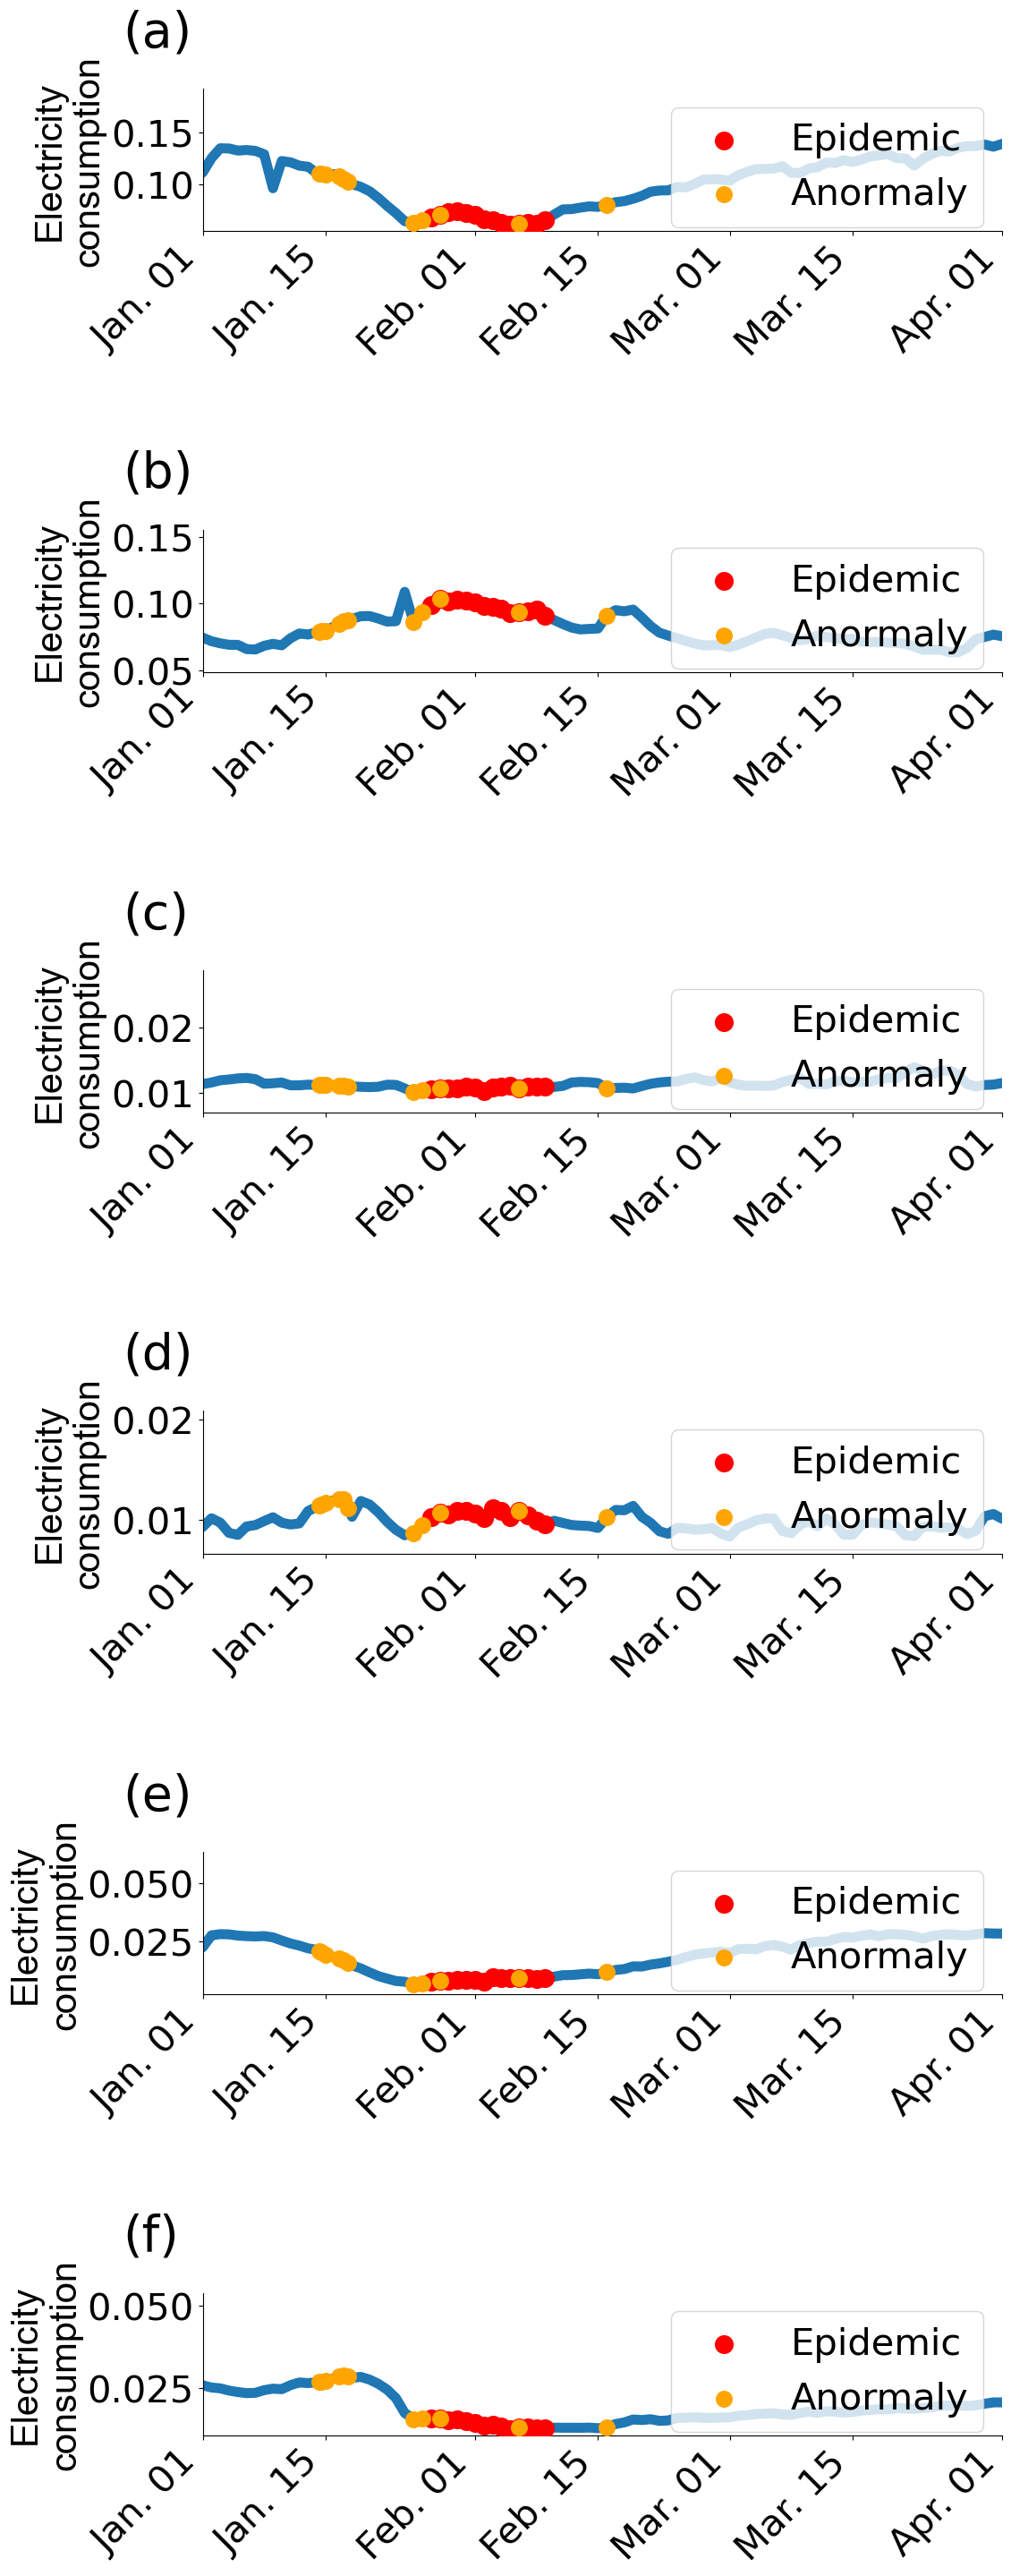

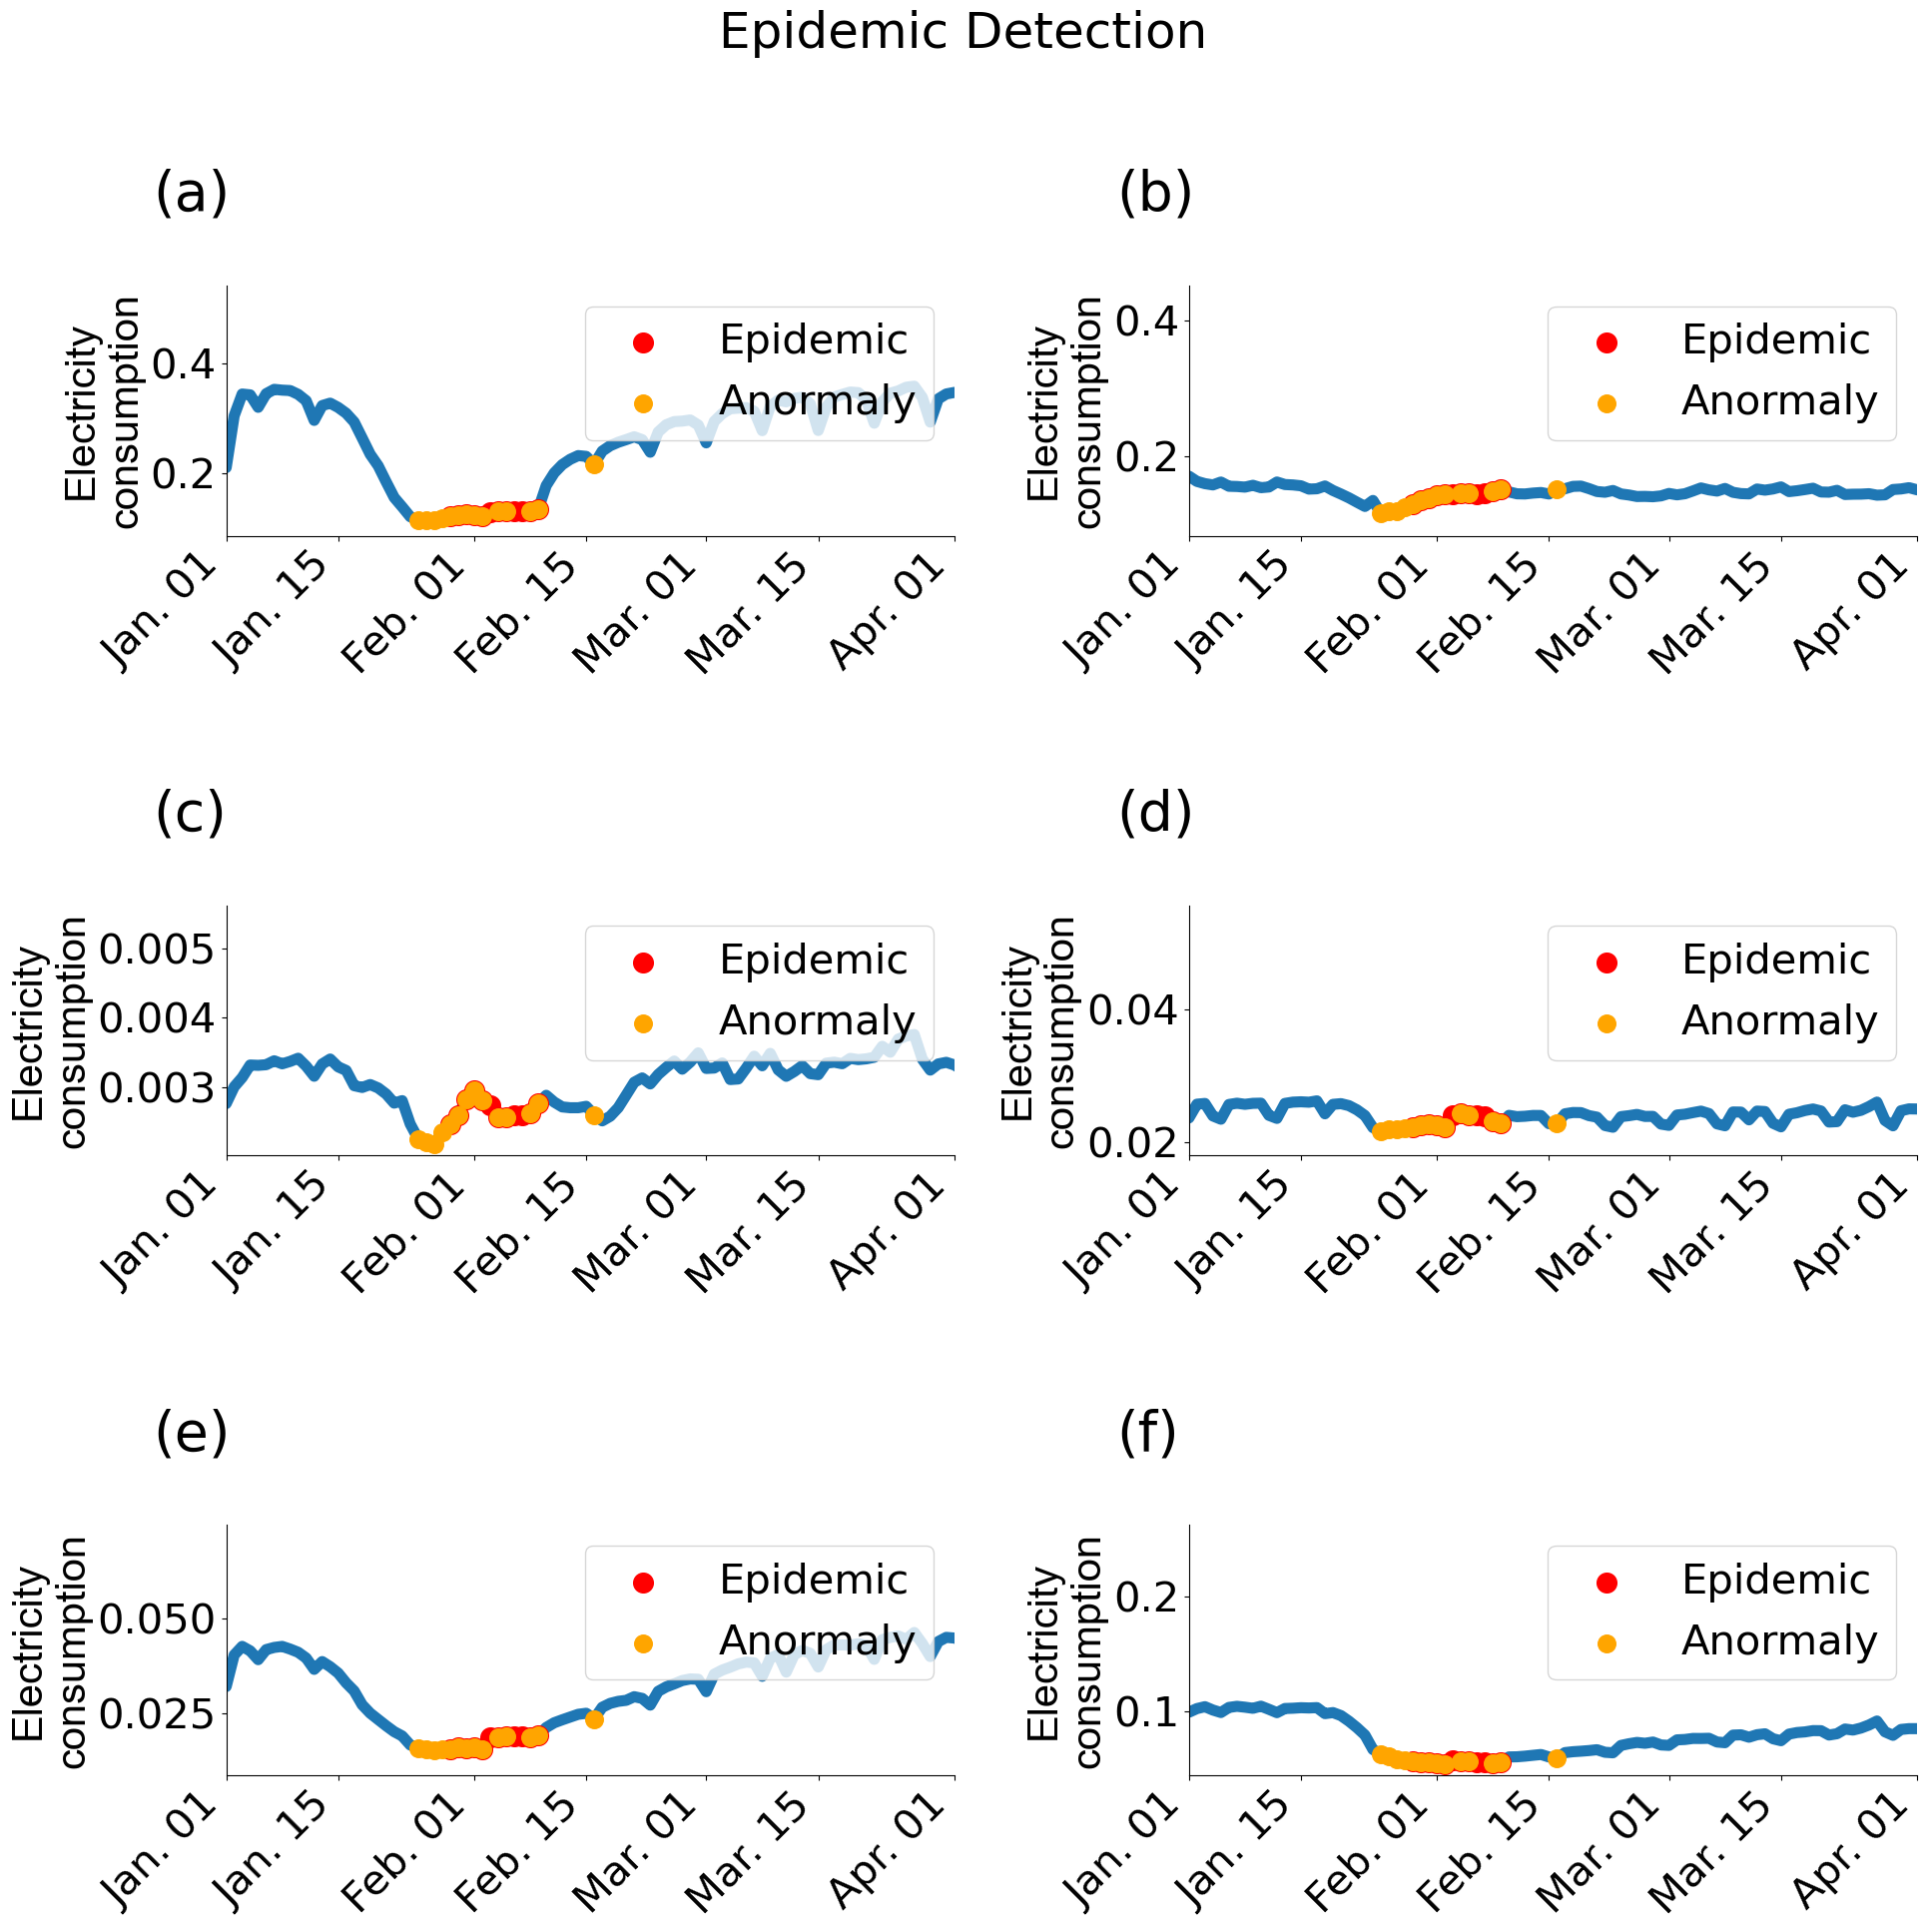

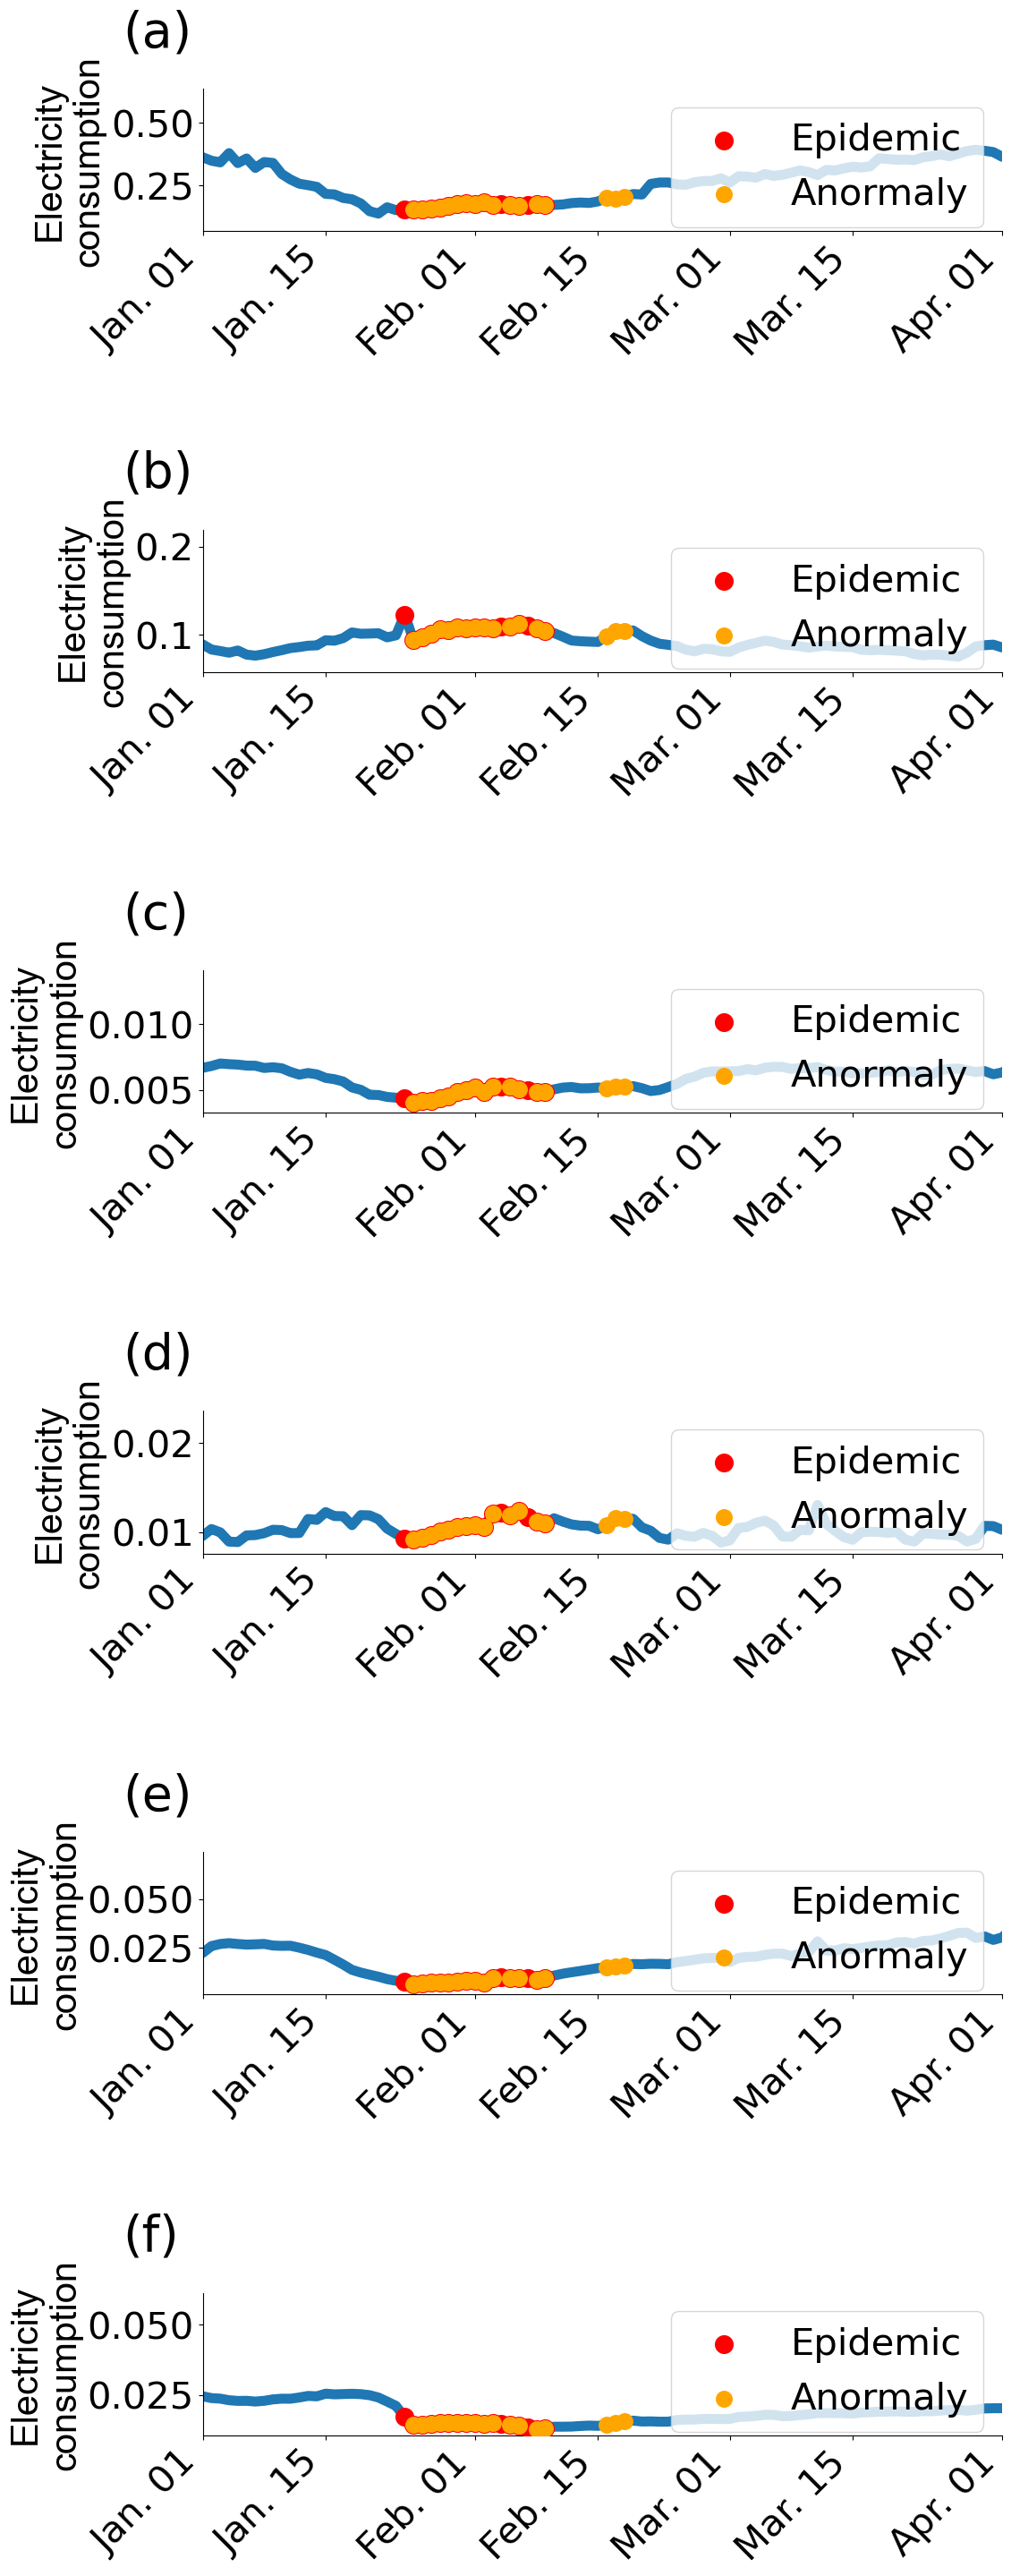

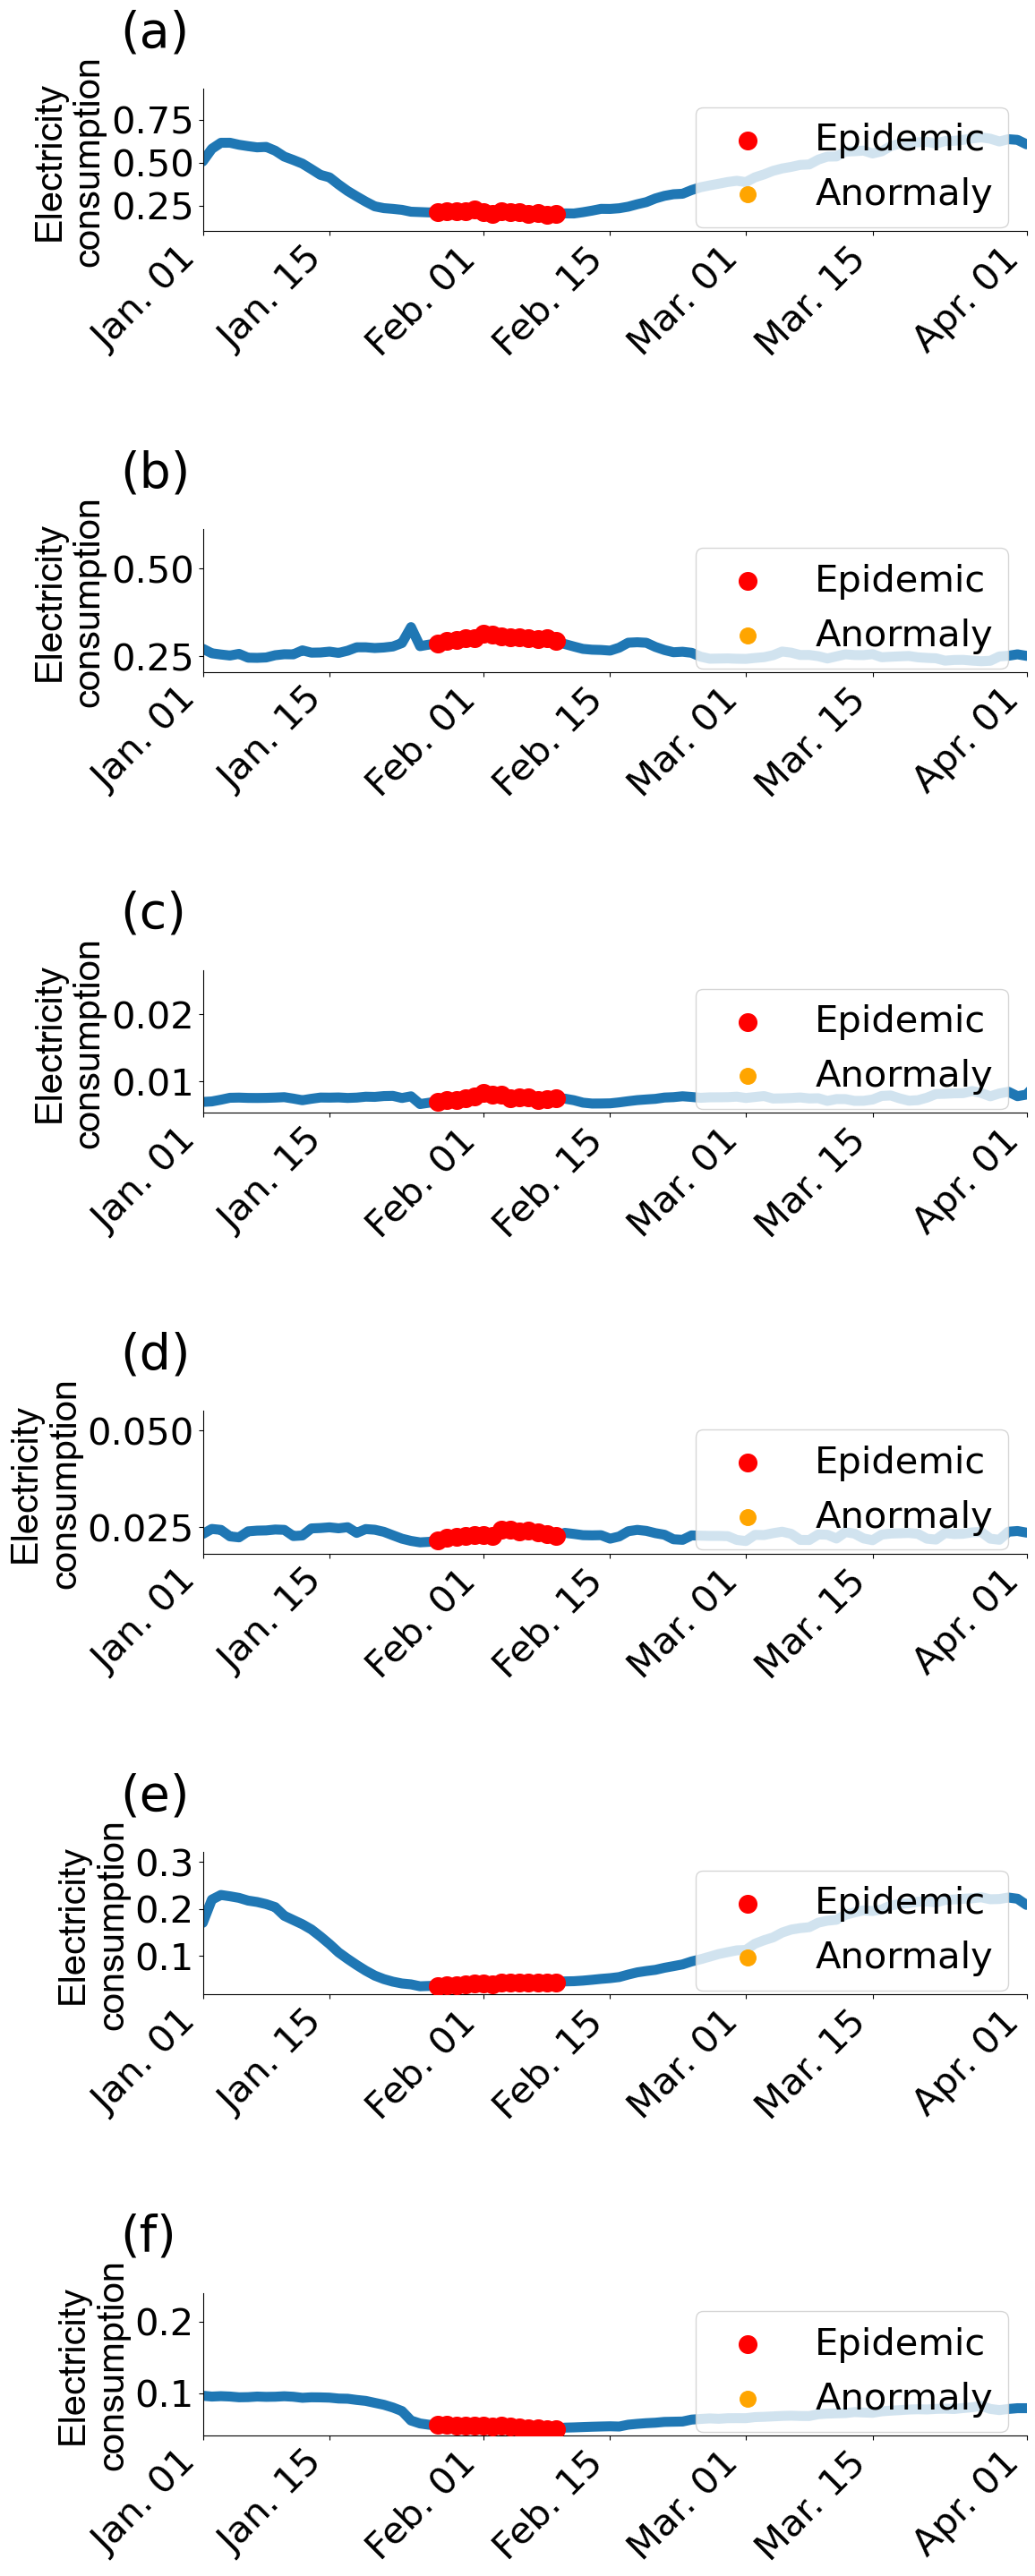

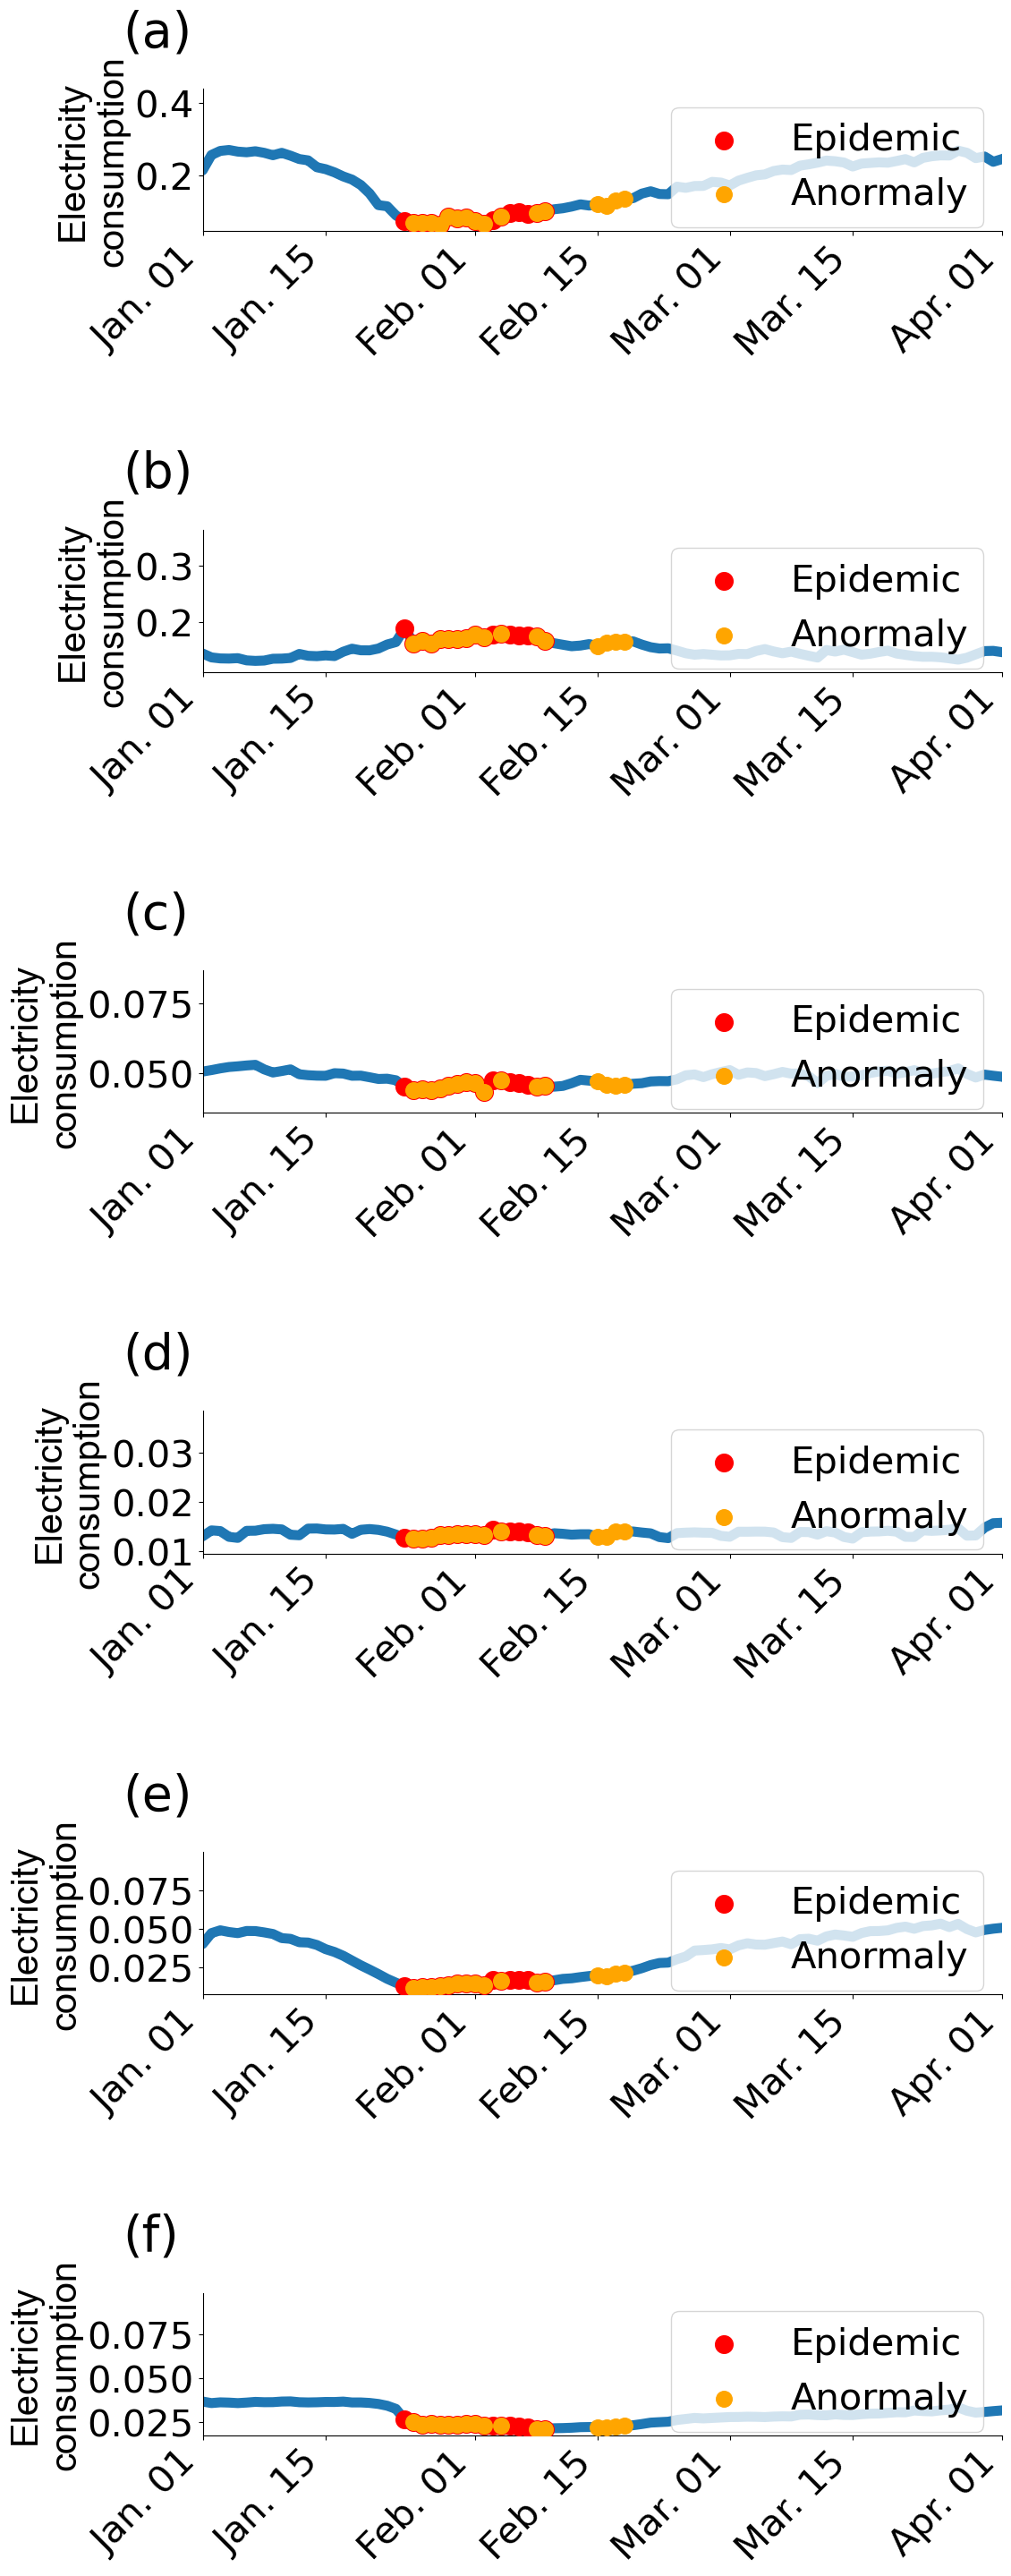

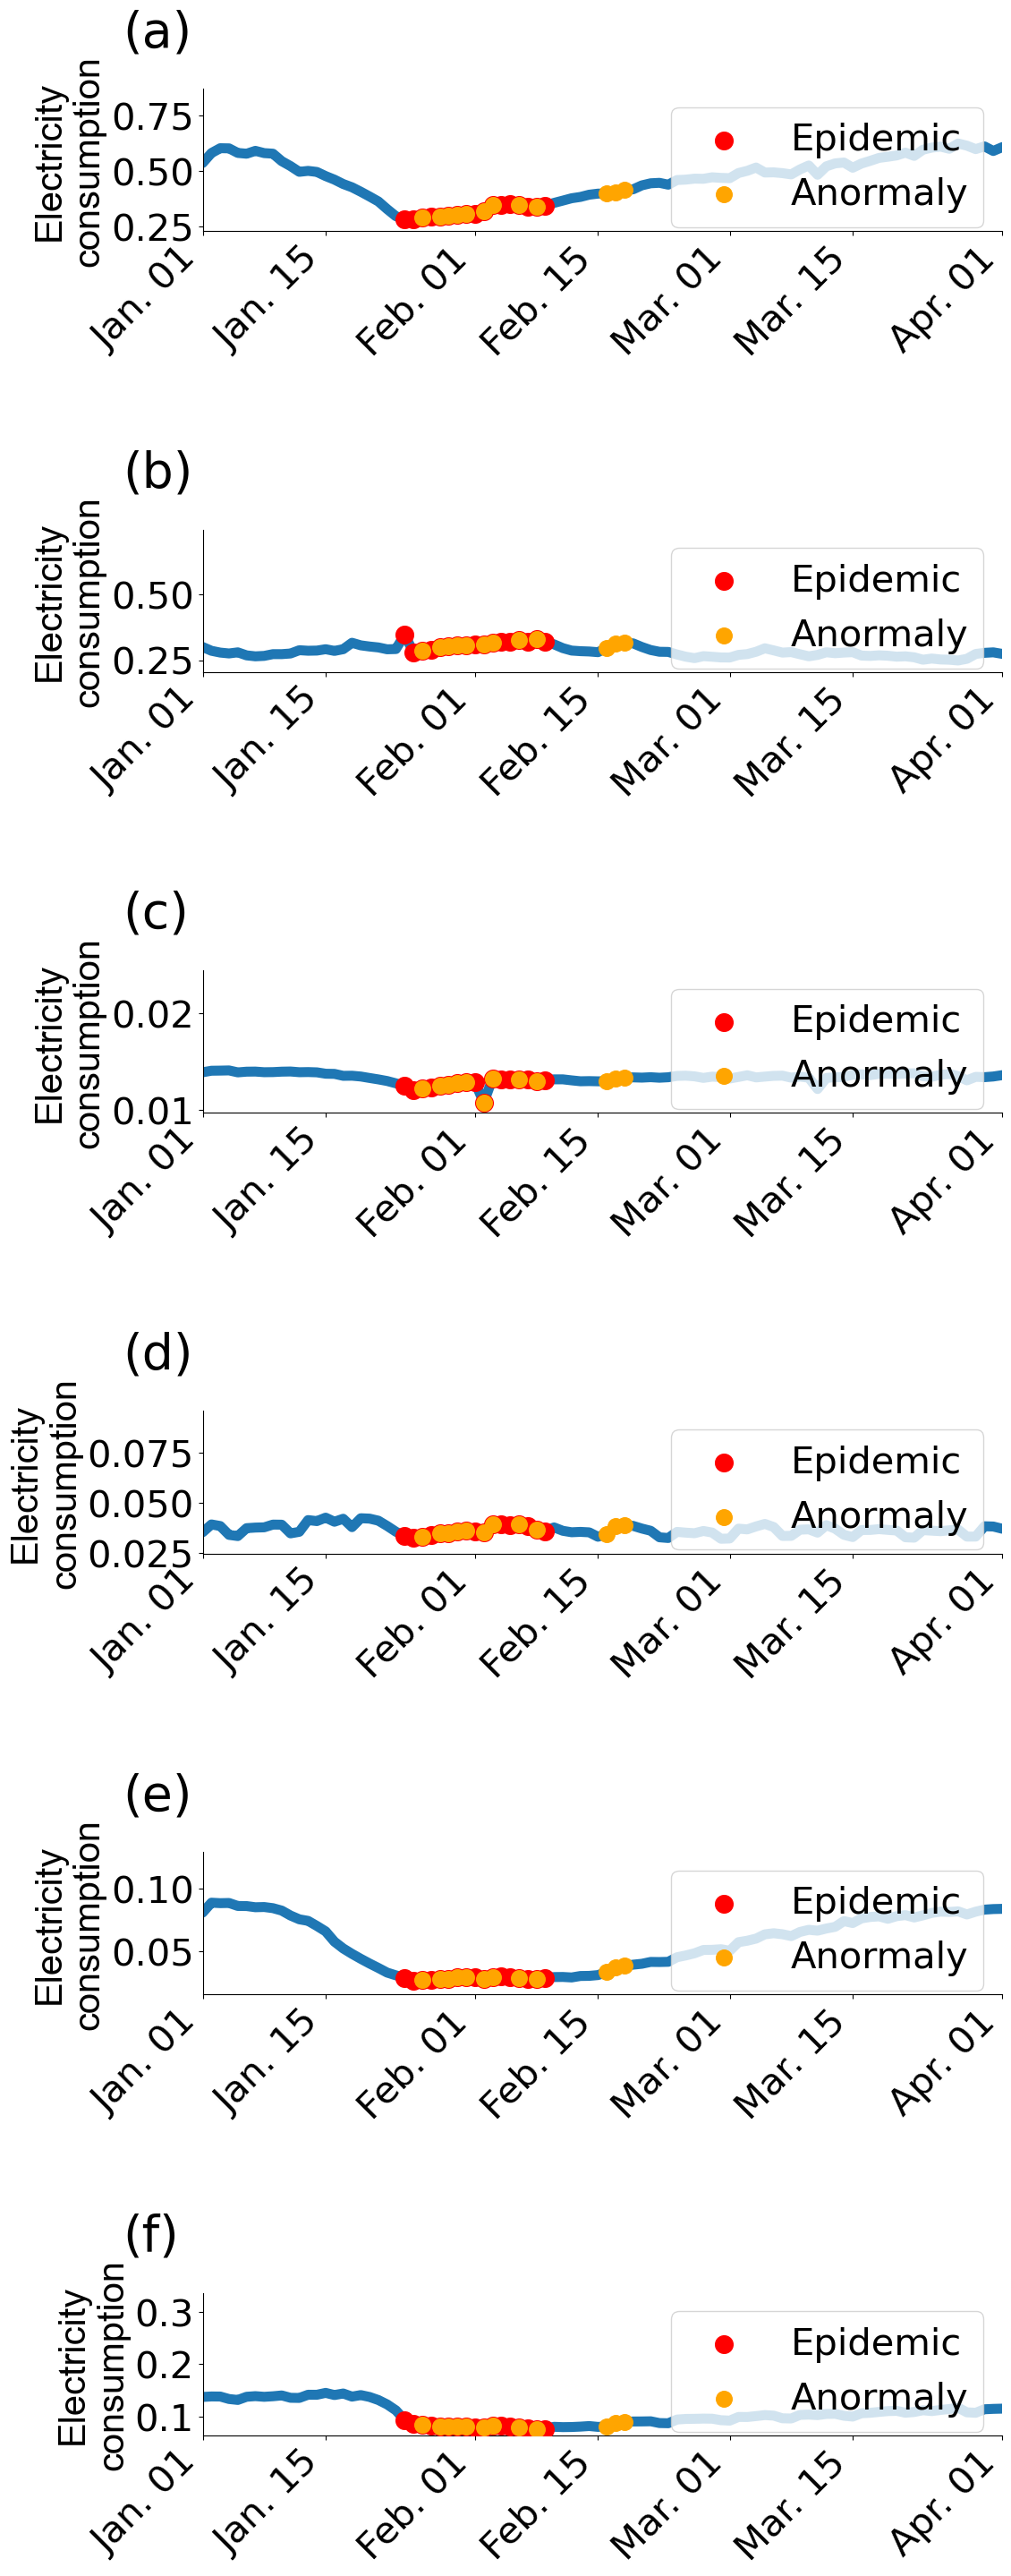

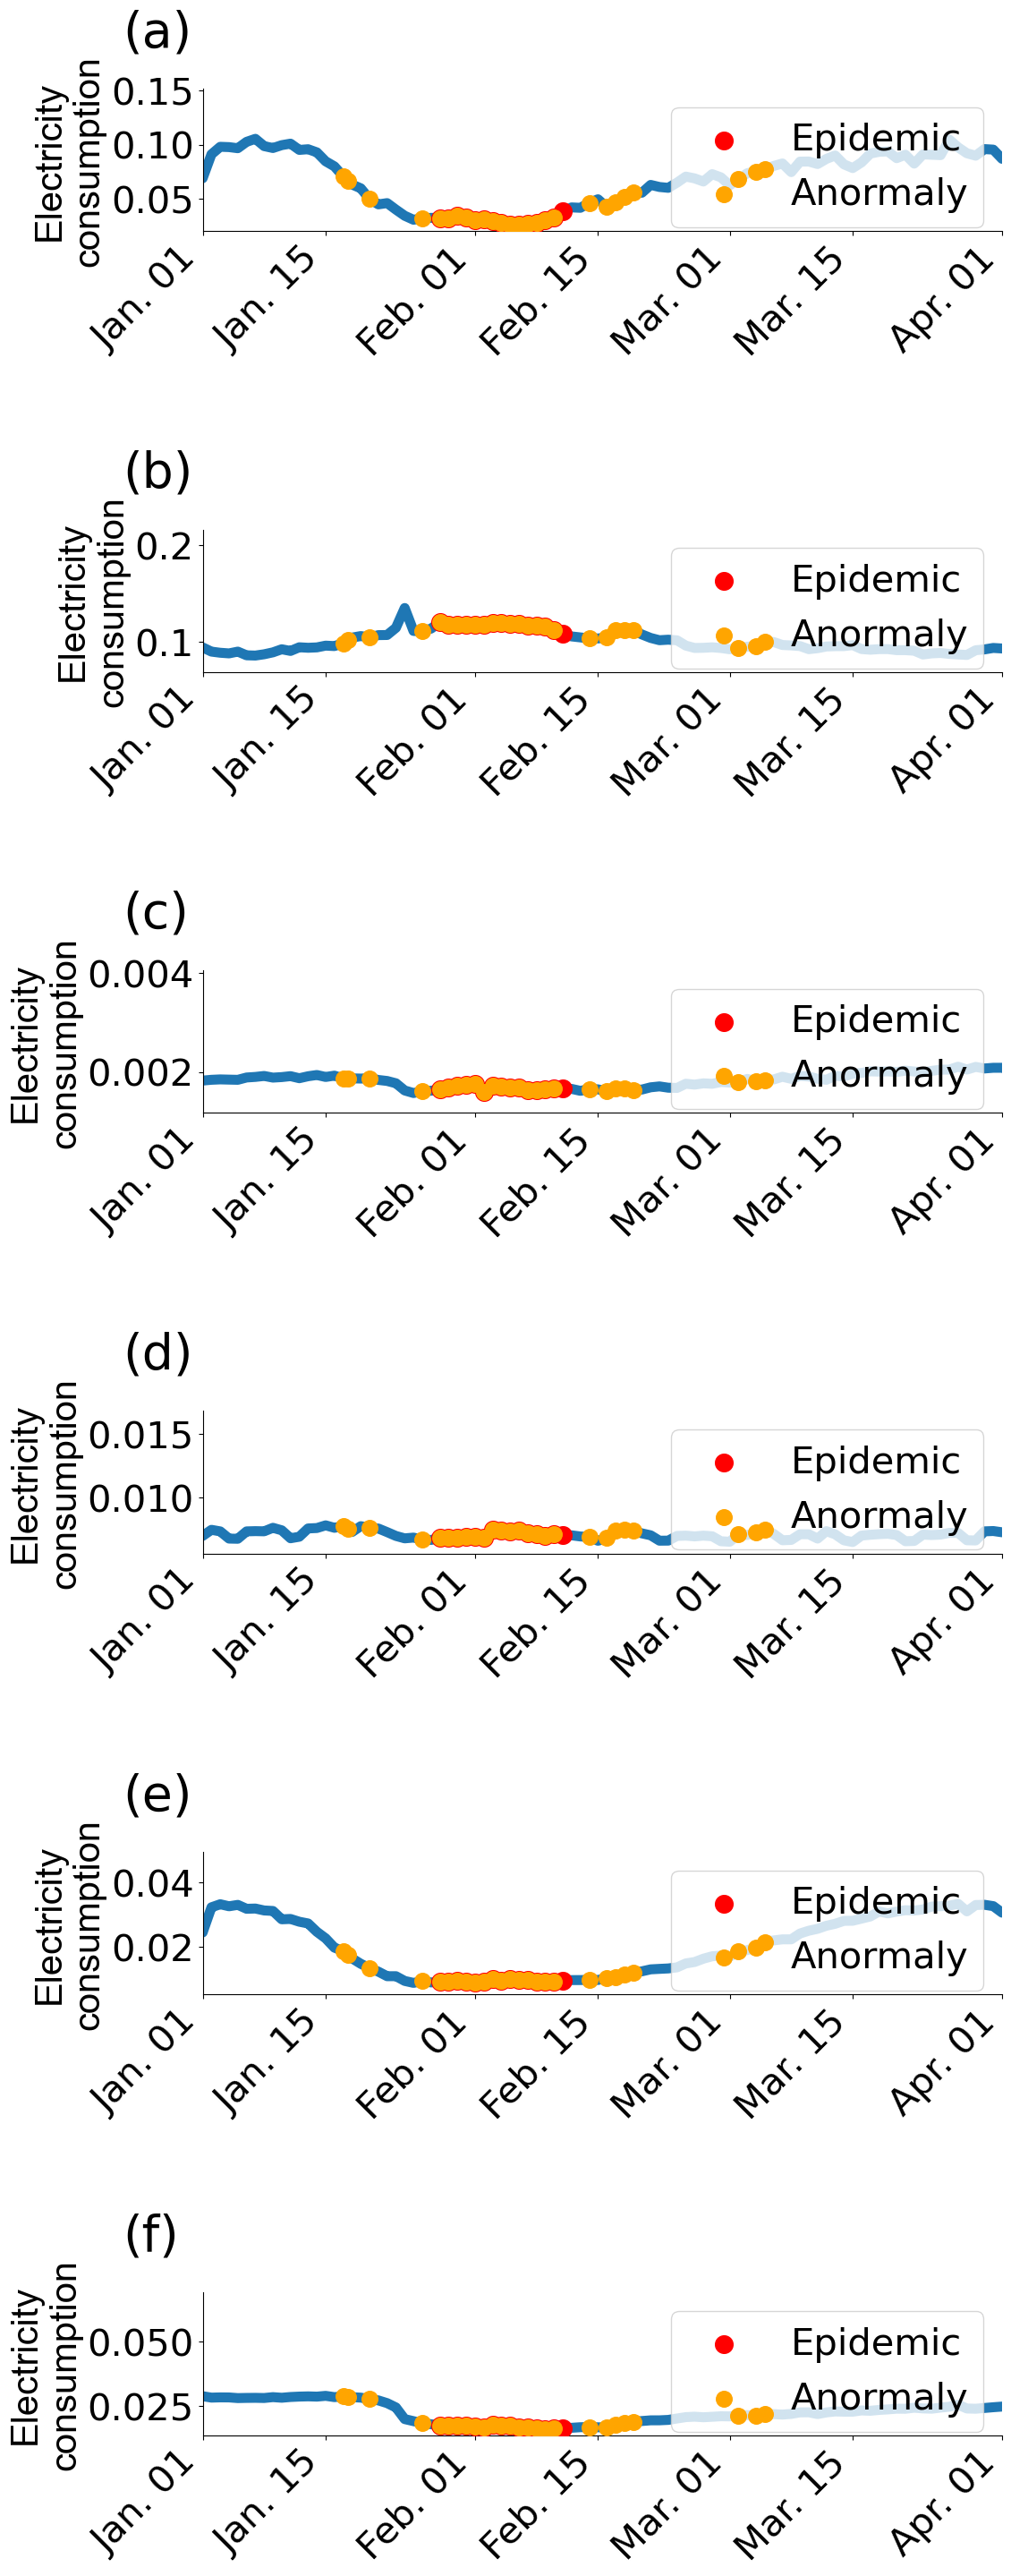

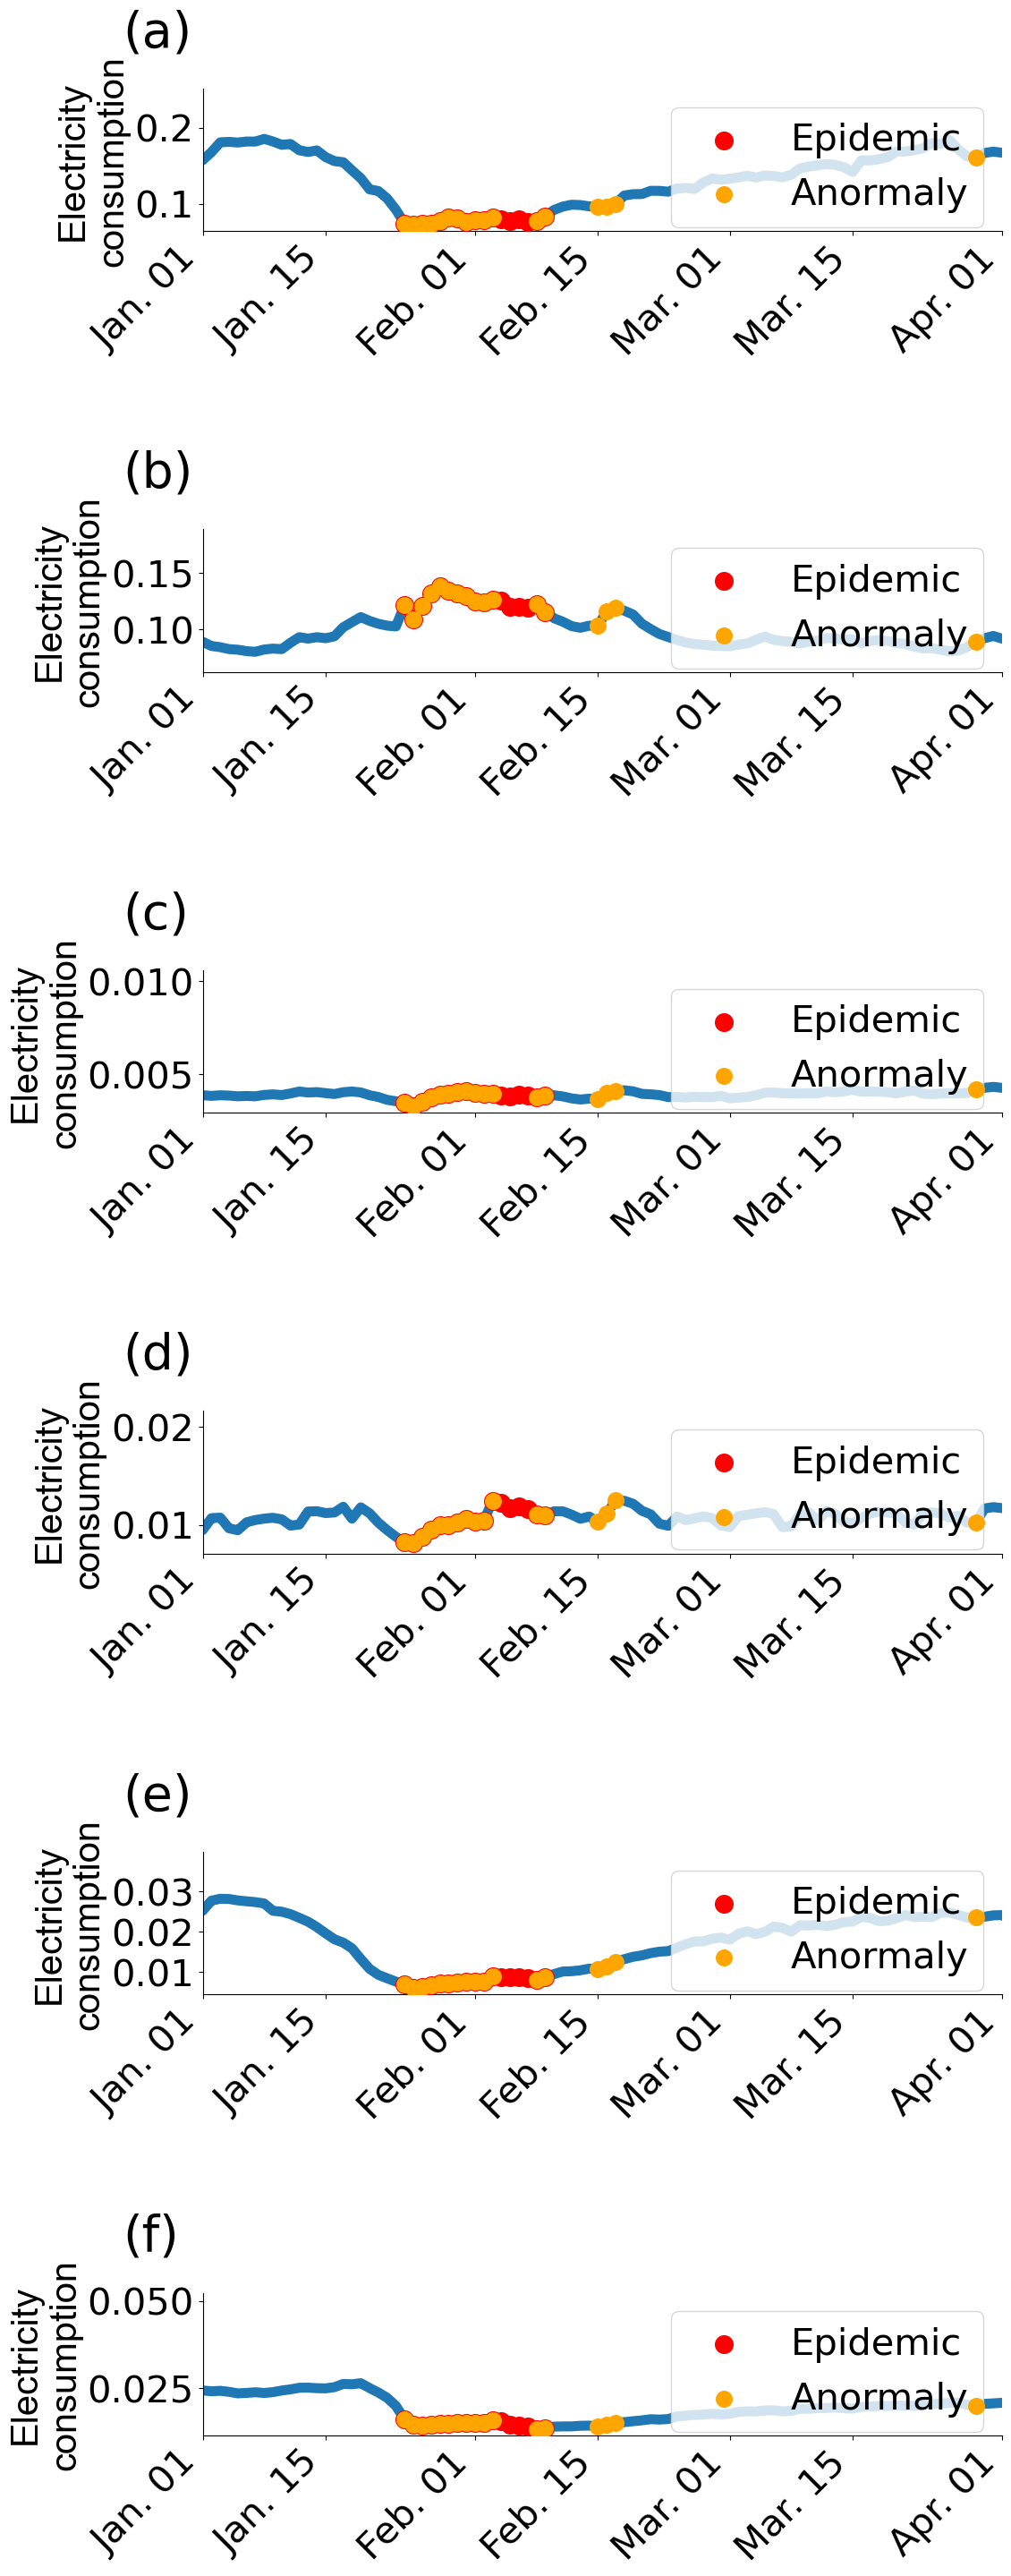

In [82]:
titles = 'a,b,c,d,e,f'.split(',')
titles = [f'({i})' for i in titles]
month_abbr = {'01-':'Jan.', '02-':'Feb.', '03-':'Mar.', '04-':'Apr.', '05-':'May', '06-':'June',
                  '07-':'July', '08-':'Aug.', '09-':'Sept.', '10-':'Oct.', '11-':'Nov.', '12-':'Dec.'}
def month_transform(x):
    try:
        return month_abbr[x[:3]]+' '+x[3:]
    except:
        return x
# month_transform = lambda x: month_abbr[x[:3]]+' '+x[3:]
for city in cities:
    if city == '厦门':
    # data = pd.read_excel('./data/数据/实际数据/九地市分用电类别数据(整理版).xlsx', sheet_name=city)
        n_col = 2
        figsize=(20, 20)
    else:
        n_col = 1
        figsize=(12, 30)
    fig, ax = plt.subplots(len(features)//n_col, n_col, figsize=figsize)
    ax = ax.reshape(-1, n_col)
    for ind, feature in enumerate(features):
        
        data = pd.read_csv(f'./data/results_main/{city}_all/test.csv')
        date = pd.to_datetime(data['timestamp'])
        label = pd.read_csv(f'./data/results_main/{city}_all/test_label.csv')
        pred = np.loadtxt(f'./data/results_main/{city}_all/pred.txt')
        criterion = np.loadtxt(f'./data/results_main/{city}_all/criterion.txt')
        y = data[feature]
        ax[ind//n_col][ind%n_col].plot(date, y, lw=8)
        ax[ind//n_col][ind%n_col].scatter(date[label.label==1], y[label.label==1], s=200, c='r', zorder=99, label='Epidemic')
        ax[ind//n_col][ind%n_col].scatter(date[criterion>np.quantile(criterion,0.95)], y[criterion>np.quantile(criterion,0.95)], s=160, c='orange',alpha=1, zorder=100, label='Anormaly')
        # ax[ind].scatter(date[pred==1], y[pred==1], s=10, c='orange',alpha=0.8, zorder=100, label='pred')
        ax[ind//n_col][ind%n_col].legend(loc=1)
        # ax[ind//n_col][ind%n_col].set_title(f'{feature_eng[feature]}')
        # ax[ind//2][ind%2].set_ylabel('用电量',font='DengXian')
        ax[ind//n_col][ind%n_col].set_ylabel('Electricity\nconsumption',font='Arial')
        ax[ind//n_col][ind%n_col].spines['right'].set_visible(False)
        ax[ind//n_col][ind%n_col].spines['top'].set_visible(False)
        ax[ind//n_col][ind%n_col].set_xlim(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-04-01'))
        # ax[ind//n_col][ind%n_col].set_xticks(ticks=x_ticks, labels=x_ticklabels,font='Arial')
        ax[ind//n_col][ind%n_col].xaxis.set_major_formatter(mdate.DateFormatter('%b. %d'))
        ylim = ax[ind//n_col][ind%n_col].get_ylim()
        xlim = ax[ind//n_col][ind%n_col].get_xlim()
        ax[ind//n_col][ind%n_col].text(xlim[0]-np.diff(xlim)[0]*0.1, ylim[1]+np.diff(ylim)[0]*0.3, titles[ind], fontsize=40)
        # ax[ind//n_col][ind%n_col].set_xticks(ax[ind//n_col][ind%n_col].get_xticks(), ax[ind//n_col][ind%n_col].get_xticklabels(), rotation=45)
        for label in ax[ind//n_col][ind%n_col].get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right') 
            # label.set_text(month_transform(label.get_text()))
    if city == '厦门':
        plt.suptitle('Epidemic Detection')
    # plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()

    # plt.savefig(f'./results/ENG_AnormalyRes_{city}.png',dpi=300)
    plt.savefig(f'./results/ENG_AnormalyRes_{city}.pdf')